In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [3]:
dataset = pd.read_csv('genres_v2.csv',low_memory=False)

In [4]:
dataset.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [5]:
cols = dataset.columns
cols

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title'],
      dtype='object')

In [6]:
dataset.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
id                   object
uri                  object
track_href           object
analysis_url         object
duration_ms           int64
time_signature        int64
genre                object
song_name            object
Unnamed: 0          float64
title                object
dtype: object

**This shows that some of the columns are of object data type and are supposed to be changed to numerical value to be used in model**

In [7]:
dataset.shape

(42305, 22)

In [8]:
dataset.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Unnamed: 0
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,20780.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685,3.972580,10483.970645
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571,0.268342,6052.359519
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000,0.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000,4.000000,5255.750000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000,4.000000,10479.500000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000,4.000000,15709.250000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000,20999.000000


In [9]:
dataset.isnull().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64

In [168]:
### song_name, unnamed, title have 50% null values

In [11]:
dataset['genre'].unique()

array(['Dark Trap', 'Underground Rap', 'Trap Metal', 'Emo', 'Rap', 'RnB',
       'Pop', 'Hiphop', 'techhouse', 'techno', 'trance', 'psytrance',
       'trap', 'dnb', 'hardstyle'], dtype=object)

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [13]:
dataset['genre'] = le.fit_transform(dataset['genre'])

In [14]:
dataset.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,0,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,0,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,0,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,0,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,0,Venom,NaN,NaN


In [15]:
dataset['genre'].unique()

array([ 0,  7,  6,  1,  4,  5,  3,  2, 11, 12, 13, 10, 14,  8,  9])

In [16]:
dataset['genre'].value_counts()

genre
7     5875
0     4578
2     3028
13    2999
14    2987
11    2975
8     2966
10    2961
12    2956
9     2936
5     2099
6     1956
4     1848
1     1680
3      461
Name: count, dtype: int64

In [17]:
dataset['genre'].dtype

dtype('int64')

In [18]:
dataset.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
id                   object
uri                  object
track_href           object
analysis_url         object
duration_ms           int64
time_signature        int64
genre                 int64
song_name            object
Unnamed: 0          float64
title                object
dtype: object

In [19]:
dataset['type'] = le.fit_transform(dataset['type'])

In [20]:
dataset['type']

0        0
1        0
2        0
3        0
4        0
        ..
42300    0
42301    0
42302    0
42303    0
42304    0
Name: type, Length: 42305, dtype: int64

In [21]:
### take one column at a time"

In [22]:
dataset['danceability'].isnull().sum()  # no nulll values

0

In [23]:
dataset['danceability'].nunique()

890

In [24]:
print('Mean ', dataset['danceability'].mean())
print('Median ', dataset['danceability'].median())
print('Mode ', dataset['danceability'].mode())

Mean  0.6393643210022456
Median  0.6459999999999999
Mode  0    0.804
Name: danceability, dtype: float64


<Figure size 1000x600 with 0 Axes>

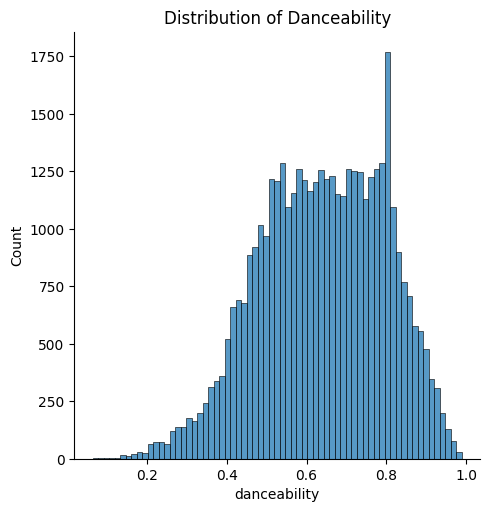

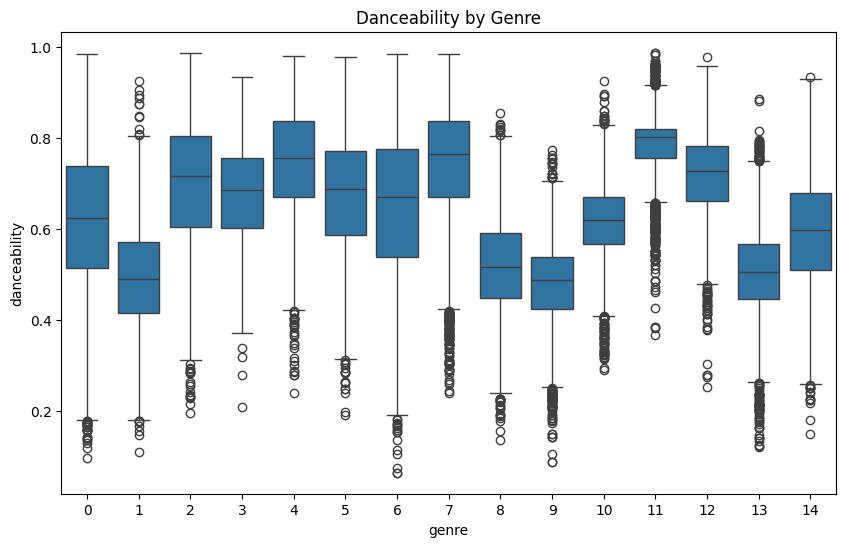

In [25]:
# Distribution of danceability
plt.figure(figsize=(10, 6))
sns.displot(dataset['danceability'])
plt.title('Distribution of Danceability')
plt.show()

# Boxplot of danceability by genre
plt.figure(figsize=(10, 6))
sns.boxplot(x='genre', y='danceability', data=dataset)
plt.title('Danceability by Genre')
plt.show()

In [26]:
dataset['energy'].isnull().sum()  # no nulll values

0

In [27]:
dataset['energy'].nunique()

917

In [28]:
print('Mean ', dataset['energy'].mean())
print('Median ', dataset['energy'].median())
print('Mode ', dataset['energy'].mode())

Mean  0.7625155912539888
Median  0.8029999999999999
Mode  0    0.977
Name: energy, dtype: float64


<Figure size 1000x800 with 0 Axes>

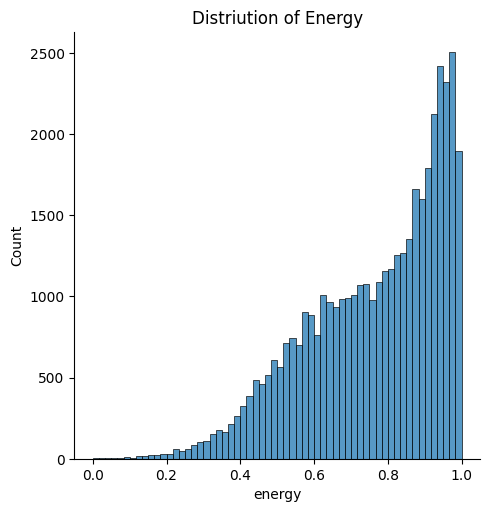

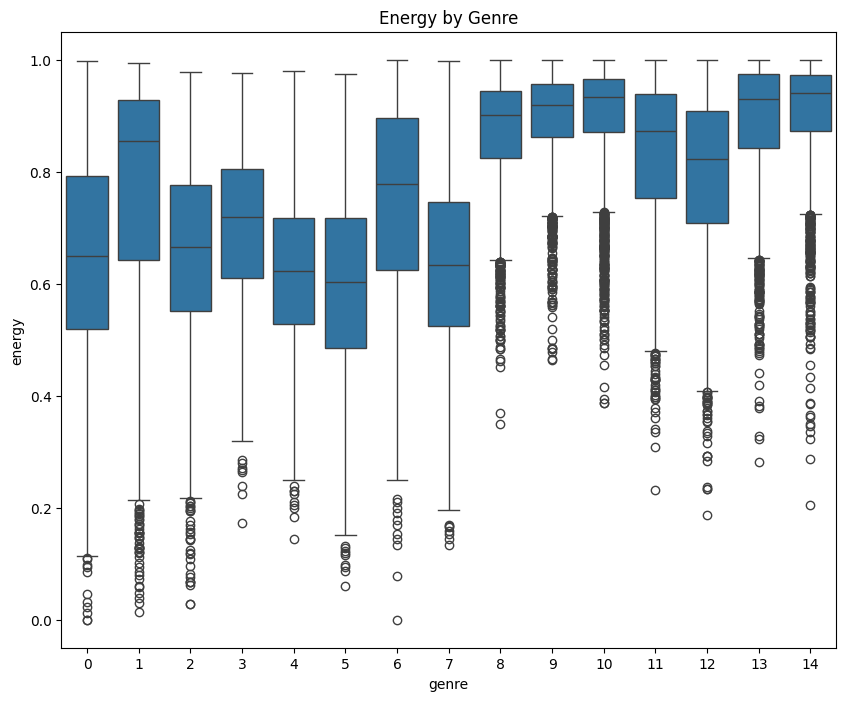

In [29]:
# distribution of energy
plt.figure(figsize = (10,8))
sns.displot(dataset['energy'])
plt.title('Distriution of Energy')
plt.show()

plt.figure(figsize = (10,8))
sns.boxplot(x = 'genre', y = 'energy', data = dataset)
plt.title('Energy by Genre')
plt.show()

In [30]:
dataset['key'].isnull().sum()  # no nulll values

0

In [31]:
dataset['key'].unique()

array([ 2,  8,  5,  0,  1, 11, 10,  6,  7,  9,  4,  3])

In [32]:
dataset.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                  int64
id                   object
uri                  object
track_href           object
analysis_url         object
duration_ms           int64
time_signature        int64
genre                 int64
song_name            object
Unnamed: 0          float64
title                object
dtype: object

In [33]:
### since id, uri, track_ref, analysis_url are not required, we will drop them.
### song name, unnamed, title will be dropped as well

In [34]:
dataset.drop(['id', 'uri', 'track_href', 'analysis_url', 'song_name', 'Unnamed: 0', 'title'], axis = 1, inplace = True)

In [35]:
dataset.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,genre
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,0,124539,4,0
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,0,224427,4,0
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,0,98821,4,0
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,0,123661,3,0
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,0,123298,4,0


In [36]:
dataset.shape

(42305, 15)

In [37]:
dataset['mode'].unique()

array([1, 0])

In [38]:
dataset['type'].unique()

array([0])

In [39]:
### we will drop type column as well as it only has one value

In [40]:
dataset.drop(['type'], axis = 1, inplace= True)

In [41]:
dataset.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,124539,4,0
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,224427,4,0
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,98821,4,0
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,123661,3,0
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,123298,4,0


In [42]:
dataset.corr()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
danceability,1.000000,-0.323248,-0.012708,-0.216776,0.084413,0.182177,0.069910,-0.067114,-0.196702,0.369845,-0.165929,-0.049807,0.057711,-0.052687
energy,-0.323248,1.000000,0.044731,0.601540,-0.032203,-0.148363,-0.497334,0.303875,0.231754,-0.013520,-0.024504,0.294464,0.039781,0.471327
key,-0.012708,0.044731,1.000000,-0.006810,-0.248283,-0.030634,-0.004937,0.068266,0.002753,0.028600,-0.009862,0.069255,0.008061,0.027398
loudness,-0.216776,0.601540,-0.006810,1.000000,-0.004744,0.048035,-0.283876,-0.187933,0.167104,0.080916,0.151610,-0.095999,0.047471,0.160771
mode,0.084413,-0.032203,-0.248283,-0.004744,1.000000,0.050260,-0.014514,-0.016402,0.007280,0.022208,-0.012191,-0.031253,-0.009317,-0.019531
speechiness,0.182177,-0.148363,-0.030634,0.048035,0.050260,1.000000,0.160184,-0.386571,0.057432,0.218829,0.164674,-0.309892,0.021637,-0.144596
acousticness,0.069910,-0.497334,-0.004937,-0.283876,-0.014514,0.160184,1.000000,-0.261896,-0.107229,0.099328,0.055643,-0.246681,-0.049791,-0.356286
instrumentalness,-0.067114,0.303875,0.068266,-0.187933,-0.016402,-0.386571,-0.261896,1.000000,-0.015990,-0.257068,-0.207667,0.603784,-0.010164,0.414434
liveness,-0.196702,0.231754,0.002753,0.167104,0.007280,0.057432,-0.107229,-0.015990,1.000000,-0.025156,0.028327,0.010594,0.003077,0.107690
valence,0.369845,-0.013520,0.028600,0.080916,0.022208,0.218829,0.099328,-0.257068,-0.025156,1.000000,0.058374,-0.191093,0.040308,-0.170698


<Axes: >

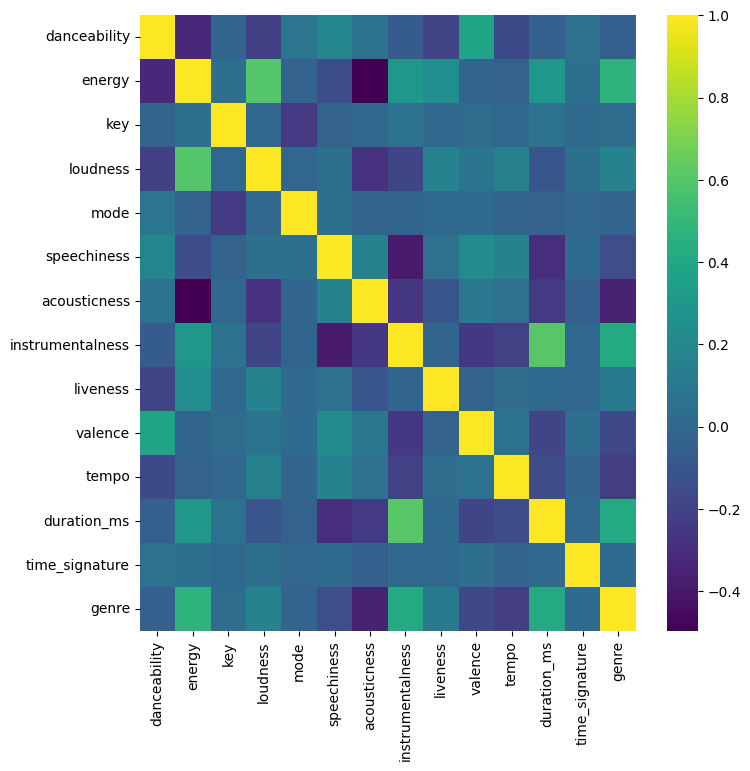

In [43]:
plt.figure(figsize = (8,8))
sns.heatmap(dataset.corr(), cmap = 'viridis')

In [44]:
### we will normalize the data as it is not in a similar range

In [45]:
X = dataset.drop(['genre'], axis = 1)
y = dataset['genre']

In [46]:
X.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,124539,4
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,224427,4
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,98821,4
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,123661,3
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,123298,4


In [47]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: genre, dtype: int64

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [143]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [144]:
X_train = scaler.fit_transform(X_train)

In [145]:
from sklearn.linear_model import LinearRegression
Lin_reg = LinearRegression()

In [146]:
Lin_reg.fit(X_train, y_train)

LinearRegression()

In [147]:
y_pred = Lin_reg.predict(scaler.transform(X_test))
y_pred

array([4.83032752, 7.72821875, 6.21153888, ..., 3.29408274, 5.39819091,
       5.27842733])

In [162]:
from sklearn.metrics import mean_squared_error, r2_score

In [149]:
MSE = mean_squared_error(y_test, y_pred)
MSE

11.979398308259851

In [150]:
r2_score = r2_score(y_test, y_pred)
r2_score

0.37609343928739425

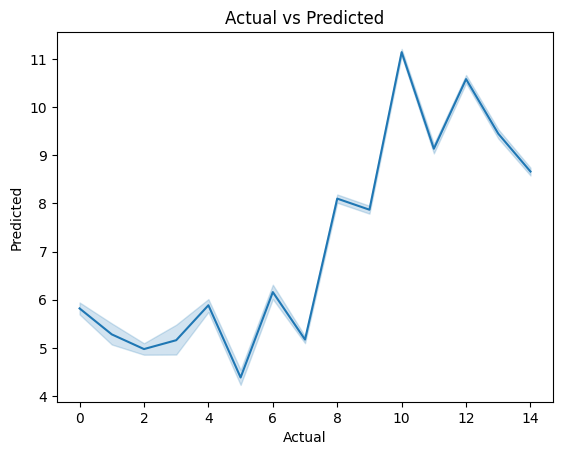

In [151]:
sns.lineplot(x = y_test, y = y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [152]:
### optimize with cross validation

In [153]:
from sklearn.model_selection import cross_val_score

In [154]:
cross_val_score(Lin_reg, X_train, y_train, cv = 5)

array([0.38374816, 0.37868043, 0.38674853, 0.36799491, 0.38482108])

In [155]:
from sklearn.model_selection import GridSearchCV

In [156]:
model_2 = GridSearchCV(Lin_reg, {'fit_intercept': [True, False]}, cv = 10)

In [157]:
model_2.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]})

In [158]:
y_pred_2 = model_2.predict(scaler.transform(X_test))

In [159]:
MSE_2 = mean_squared_error(y_test, y_pred_2)
MSE_2

11.979398308259851

In [163]:
r2_score_2 = r2_score(y_test, y_pred_2)
print(r2_score_2)

0.37609343928739425


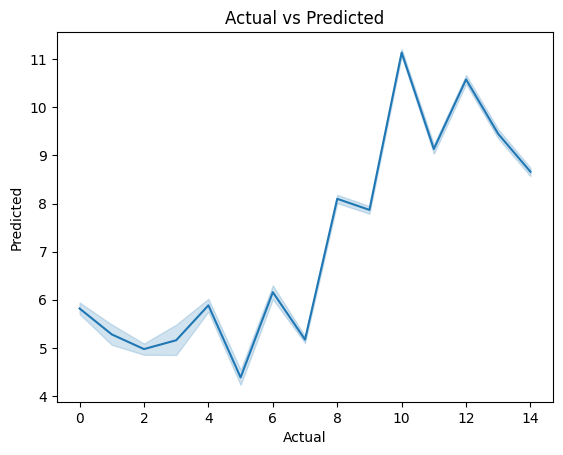

In [164]:
sns.lineplot(x = y_test, y = y_pred_2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [166]:
results_df = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred_2})
results_df

,Actual,Predicted
11436,6,4.830328
37388,8,7.728219
374,0,6.211539
33744,14,8.652800
13594,1,7.834611
...,...,...
28156,13,10.704681
11,0,8.871444
18226,3,3.294083
93,0,5.398191
